In [3]:
from torchvision import transforms
IMG_SIZE = 224

manual_transforms= transforms.Compose([
transforms.Resize((IMG_SIZE,IMG_SIZE)),
transforms.ToTensor()])

print(f"Manually created transforms: {manual_transforms}")

Manually created transforms: Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
    ToTensor()
)


In [ ]:
import sys
import os
sys.path.append(os.path.abspath("../going_modular"))

import going_modular 

ModuleNotFoundError: No module named 'going_modular'

In [6]:
import os
print(os.path.exists("../going_modular/going_modular"))


True


In [2]:
sys.path

['/home/user/anaconda3/envs/vit3/lib/python39.zip',
 '/home/user/anaconda3/envs/vit3/lib/python3.9',
 '/home/user/anaconda3/envs/vit3/lib/python3.9/lib-dynload',
 '',
 '/home/user/anaconda3/envs/vit3/lib/python3.9/site-packages',
 '/home/user/Desktop/vit/going_modular/going_modular']

In [2]:
going_modular.create_dataloaders()  

TypeError: create_dataloaders() missing 5 required positional arguments: 'train_dir', 'test_dir', 'test_transform', 'train_transform', and 'batch_size'

In [2]:
create_dataloaders()


<module 'going_modular' from '/home/user/Desktop/vit/going_modular/going_modular/__init__.py'>

In [9]:
import going_modular 

In [2]:
print(going_modular.__file__)

None


In [2]:
import sys
import os
sys.path.append(os.path.abspath(".."))
from going_modular.utils import *

ModuleNotFoundError: No module named 'going_modular.utils'

In [2]:
import sys
import os
sys.path.append(os.path.abspath("."))
os.path.abspath("./")

'/home/user/Desktop/vit/notbookExp'

In [1]:
import sys
import os
sys.path.append(os.path.abspath("/home/user/Desktop/vit/going_modularp"))


In [4]:
sys.path

['/home/user/anaconda3/envs/vit3/lib/python39.zip',
 '/home/user/anaconda3/envs/vit3/lib/python3.9',
 '/home/user/anaconda3/envs/vit3/lib/python3.9/lib-dynload',
 '',
 '/home/user/anaconda3/envs/vit3/lib/python3.9/site-packages',
 '/home/user/Desktop/vit/going_modularp/going_modular']

In [2]:
# from ../going_modular import 
# train_dataLoader , test_dataLoader , class_name =  
from going_modular import *
 create_dataloaders()

TypeError: create_dataloaders() missing 5 required positional arguments: 'train_dir', 'test_dir', 'test_transform', 'train_transform', and 'batch_size'

In [ ]:

# create_dataloaders()

ModuleNotFoundError: No module named 'going_modular'

In [7]:
ls -l /home/user/Desktop/vit/going_modularp/


total 12
drwxrwxr-x 3 user user 4096 янв 28 19:06 data/
drwxrwxr-x 4 user user 4096 янв 30 09:29 going_modular/
-rw-rw-r-- 1 user user 2354 янв 29 05:15 noteb.ipynb


In [3]:
import importlib
import going_modular
importlib.reload(going_modular)

<module 'going_modular' from '/home/user/Desktop/vit/going_modularp/going_modular/__init__.py'>

In [1]:
from data_setup import create_dataloaders
import torch 
from torchvision import transforms
IMG_SIZE = 224
BATCH_SIZE = 32
train_dir = "/home/user/Desktop/vit/going_modularp/data/pizza_steak_sushi/train"
test_dir = "/home/user/Desktop/vit/going_modularp/data/pizza_steak_sushi/test"
manual_transforms= transforms.Compose([
transforms.Resize((IMG_SIZE,IMG_SIZE)),
transforms.ToTensor()])
device = "cuda" if torch.cuda.is_available else "cpu"
print(f"Manually created transforms: {manual_transforms}")
test_transforms= transforms.Compose([
transforms.Resize((IMG_SIZE,IMG_SIZE)),
transforms.ToTensor()])
train_loader , test_loader , class_name = create_dataloaders(train_dir= train_dir , test_dir= test_dir , test_transform=test_transforms , train_transform=manual_transforms , batch_size=BATCH_SIZE )

Manually created transforms: Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
    ToTensor()
)


In [2]:
train_loader , test_loader , class_name

(<torch.utils.data.dataloader.DataLoader at 0x7f3c3d409be0>,
 ['pizza', 'steak', 'sushi'])

In [3]:
image_batch , label_batch = next(iter(train_loader))
image , label = image_batch[0] , label_batch[0] 
image.shape, label

(torch.Size([3, 224, 224]), tensor(1))

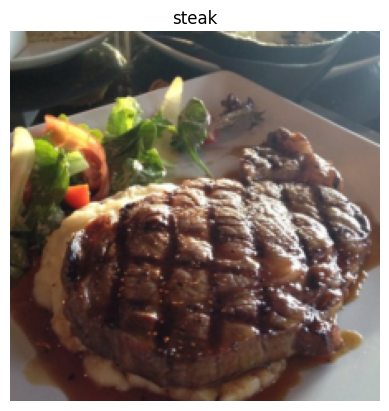

In [4]:
import matplotlib.pyplot as plt
plt.imshow(image.permute(1, 2, 0)) # rearrange image dimensions to suit matplotlib [color_channels, height, width] -> [height, width, color_channels]
plt.title(class_name[label])
plt.axis(False);

In [5]:
height = 224
width = 224
color_channels=3
patch_size=16
number_of_patches=int((height*width)/(patch_size**2))
print(f"# of patches = {number_of_patches}")

# of patches = 196


In [8]:
empeding_layer_input_shape = (height , width , color_channels)
empeding_layer_output_shape  = (number_of_patches,patch_size**2 * color_channels)
print(f"Input shape (single 2D image): {empeding_layer_input_shape}")
print(f"Output shape (single 2D image flattened into patches): {empeding_layer_output_shape}")

Input shape (single 2D image): (224, 224, 3)
Output shape (single 2D image flattened into patches): (196, 768)


Text(0.5, 1.0, 'steak')

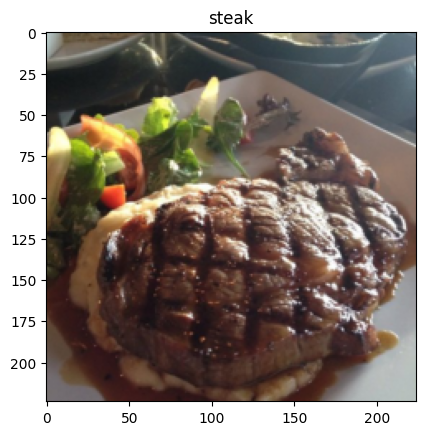

In [15]:
plt.imshow(image.permute(1,2,0))
plt.title(class_name[label])
plt.axis(False);


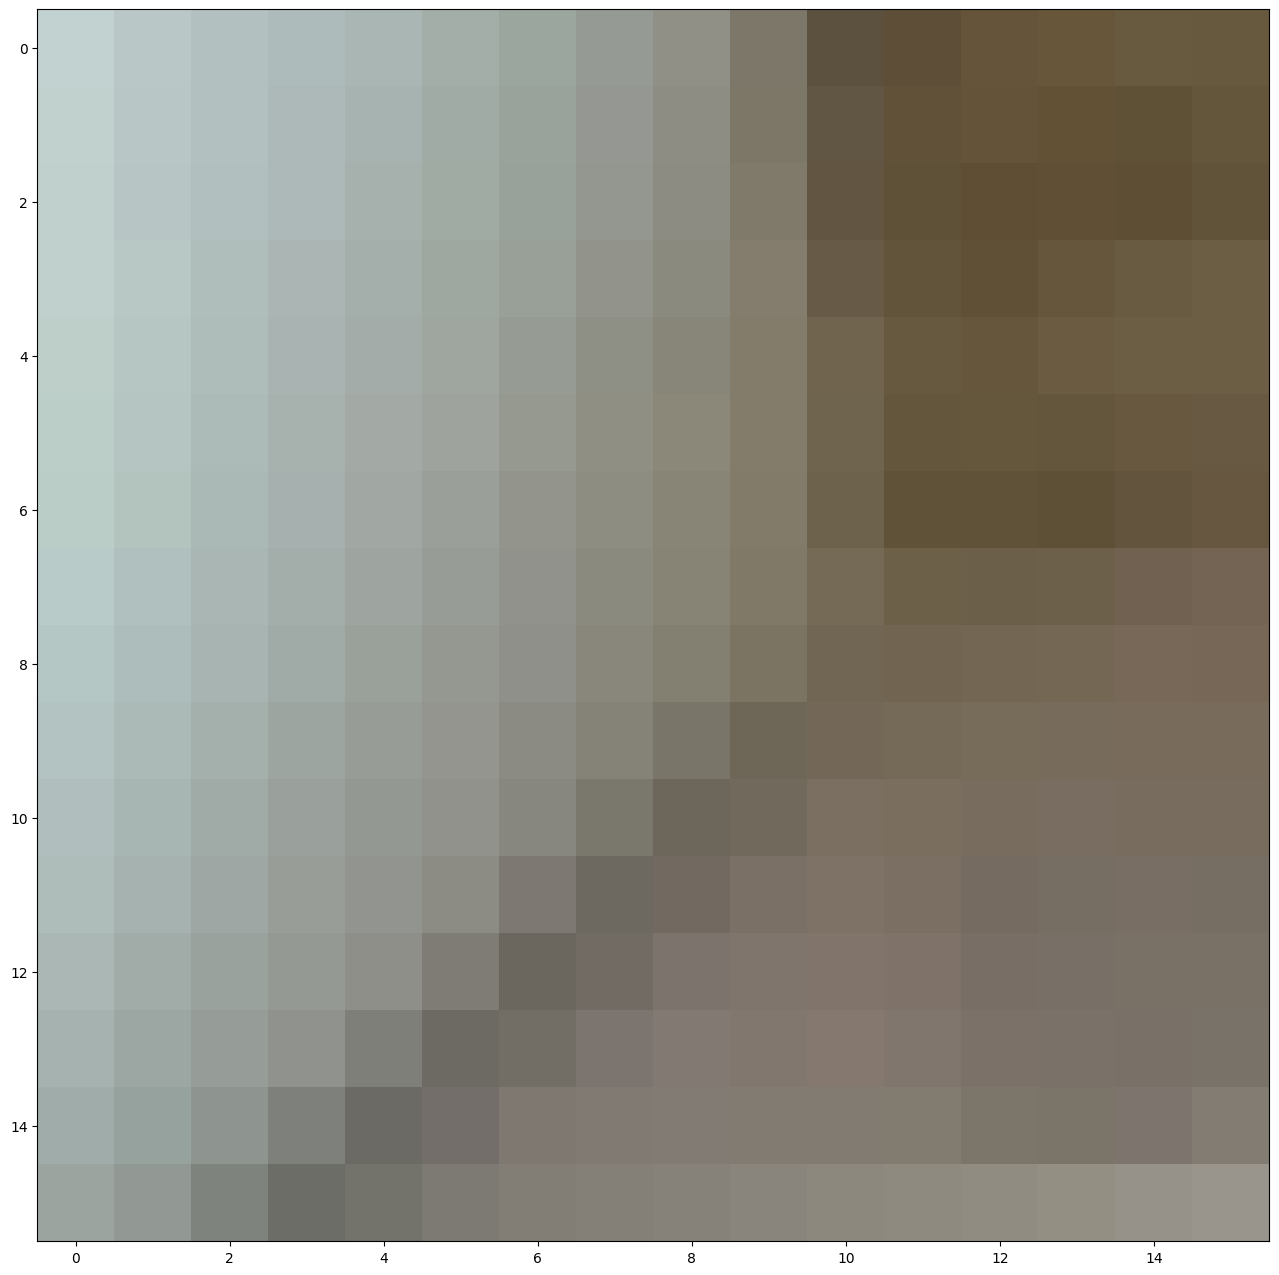

In [19]:
permuted_image = image.permute(1,2,0)
plt.figure(figsize=(patch_size,patch_size))
plt.imshow(permuted_image[:patch_size , :patch_size ,:])

In [29]:
def create_patches(patch_size: int , width: int , height : int ,image):
     
    patches = []
    for i in range(width // patch_size) :
        for j in range ( height // patch_size ):
            patches.append(image[i*patch_size:(i+1)*patch_size,j*patch_size:(j+1)*patch_size,:])
    return patches

tes = create_patches(patch_size=16 ,image= permuted_image , width= 224 , height = 224)

In [43]:
import numpy as np

def create_patches(image: np.ndarray, patch_size: int) -> np.ndarray:
    """Splits an image into non-overlapping patches (NumPy version).

    Args:
        image (np.ndarray): Input image of shape (H, W, C).
        patch_size (int): Size of each patch.

    Returns:
        np.ndarray: Array of shape (num_patches, patch_size, patch_size, C).
    """
    H, W, C = image.shape
    assert H % patch_size == 0 and W % patch_size == 0, "Image dimensions must be divisible by patch_size"

    # Reshape and reorder dimensions
    patches = image.reshape(H // patch_size, patch_size, W // patch_size, patch_size, C)
    patches = np.transpose(patches, (0, 2, 1, 3, 4))  # Correct NumPy transpose
    patches = patches.reshape(-1, patch_size, patch_size, C)  # Flatten into patches

    return patches

# Example usage:
tes = create_patches(permuted_image, patch_size=16)  # Ensure permuted_image is a NumPy array


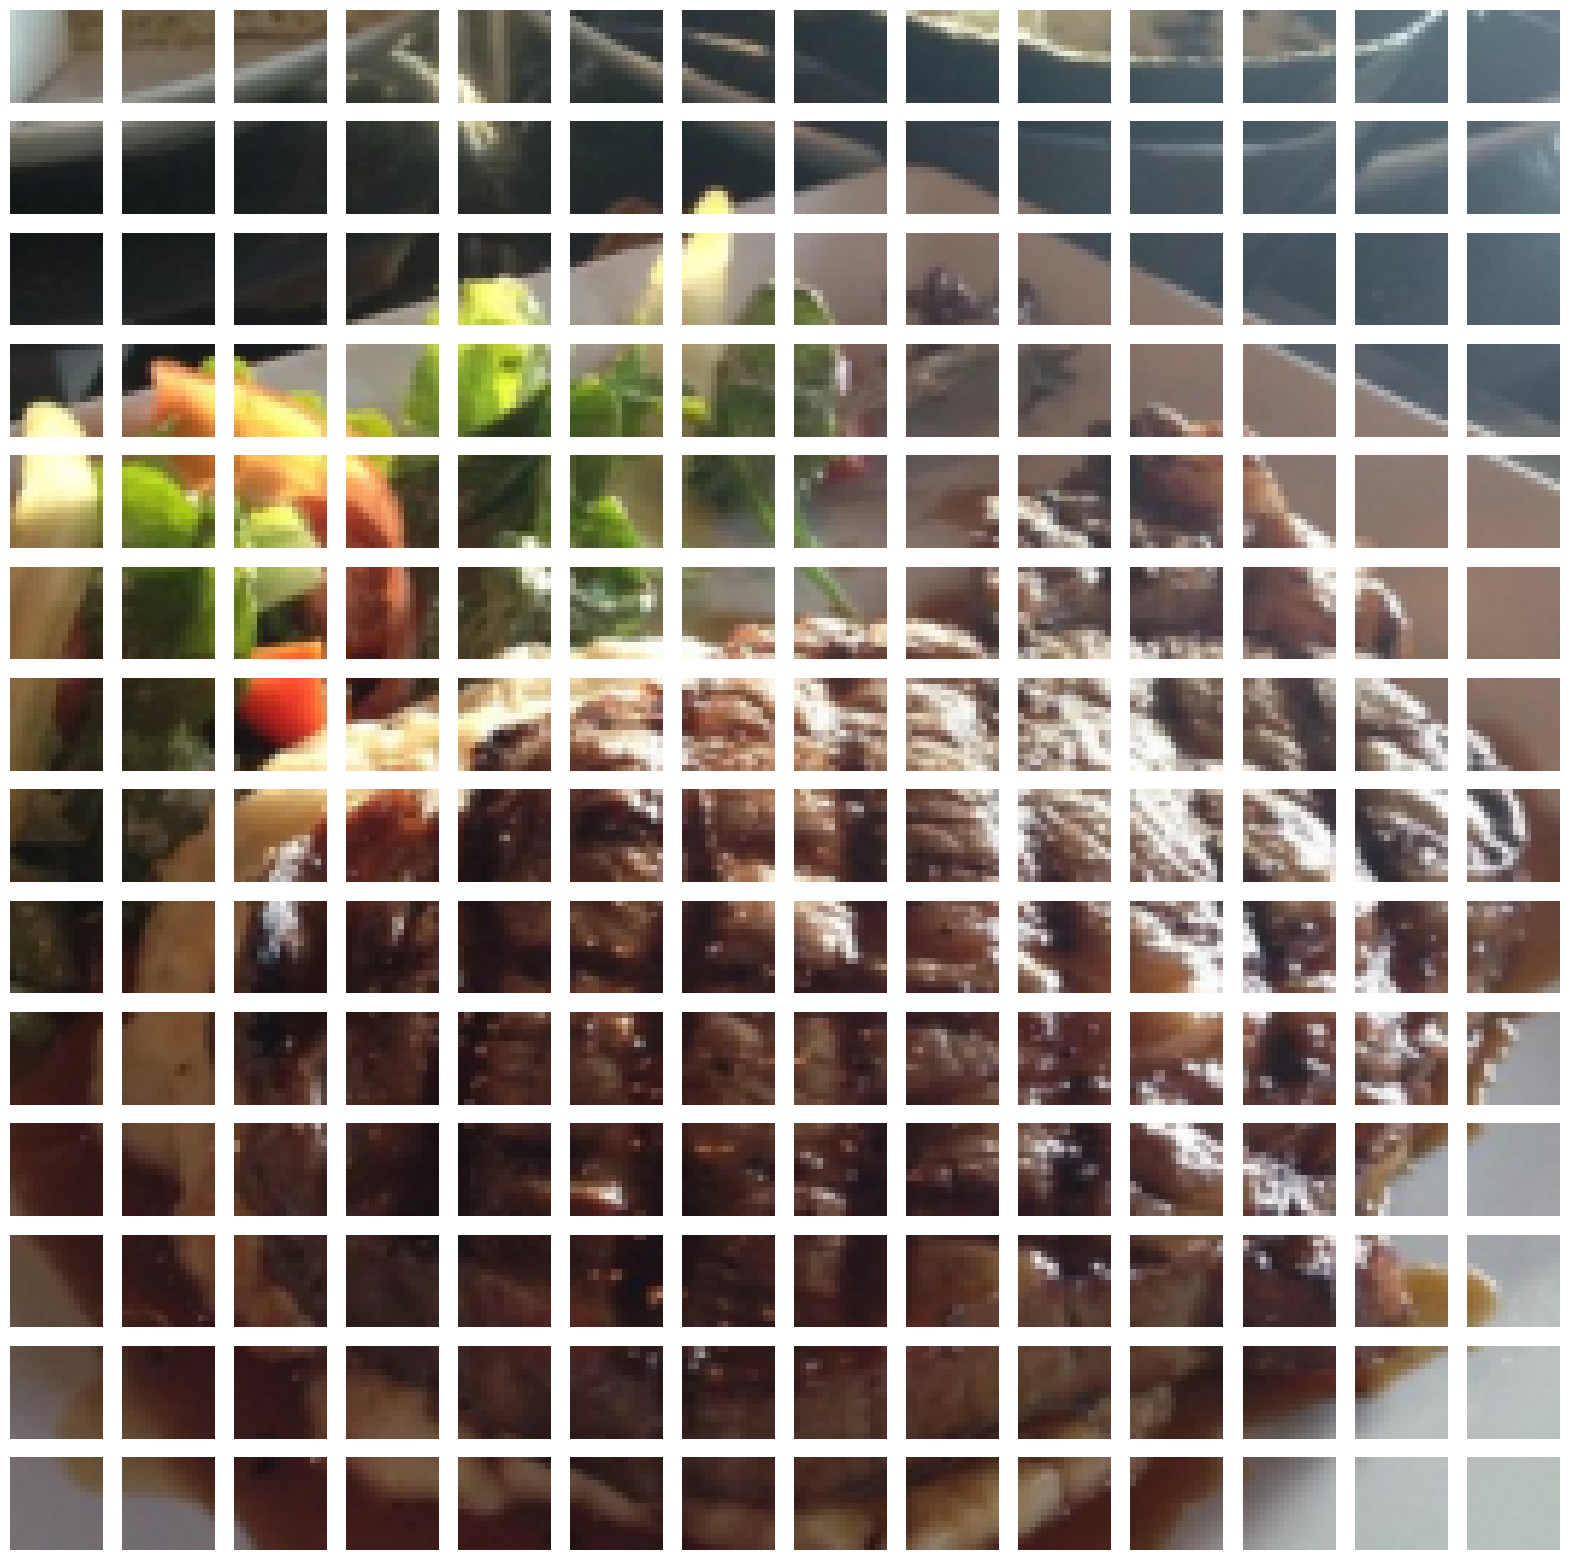

In [53]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 20))  # Corrected variable name

rows = height // patch_size
cols = width // patch_size

for i in range(rows):
    for j in range(cols):
        index = i * cols + j + 1  # Compute the subplot index correctly
        sub = fig.add_subplot(rows, cols, index)
        sub.imshow(tes[index-1], interpolation='nearest')
        sub.axis("off")

plt.show()


AttributeError: 'Tensor' object has no attribute 'Rectangle'

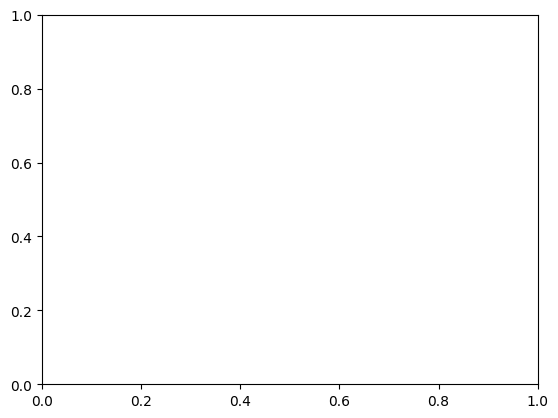

In [44]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create figure and axis
fig, ax = plt.subplots()

# Create a rectangle patch (x, y, width, height)
rect = tes.Rectangle((0.2, 0.3), 0.4, 0.5, linewidth=2, edgecolor='r', facecolor='none')

# Add the rectangle to the axes
ax.add_patch(rect)

# Set limits and display
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
plt.show()

In [37]:
tes

tensor([[[[0.7608, 0.8235, 0.8157],
          [0.7255, 0.7843, 0.7804],
          [0.6980, 0.7529, 0.7529],
          ...,
          [0.4078, 0.3373, 0.2314],
          [0.4078, 0.3529, 0.2471],
          [0.4039, 0.3490, 0.2431]],

         [[0.7569, 0.8196, 0.8078],
          [0.7216, 0.7804, 0.7765],
          [0.7020, 0.7529, 0.7529],
          ...,
          [0.3882, 0.3176, 0.2118],
          [0.3725, 0.3176, 0.2118],
          [0.3922, 0.3373, 0.2314]],

         [[0.7529, 0.8157, 0.8039],
          [0.7176, 0.7765, 0.7725],
          [0.6941, 0.7490, 0.7490],
          ...,
          [0.3765, 0.3098, 0.2078],
          [0.3647, 0.3059, 0.2039],
          [0.3804, 0.3255, 0.2235]],

         ...,

         [[0.6510, 0.6980, 0.6863],
          [0.6118, 0.6549, 0.6392],
          [0.5882, 0.6157, 0.6000],
          ...,
          [0.4784, 0.4431, 0.4118],
          [0.4745, 0.4431, 0.4078],
          [0.4745, 0.4471, 0.4078]],

         [[0.6235, 0.6745, 0.6627],
          [0.5882

In [38]:
len(tes)

196

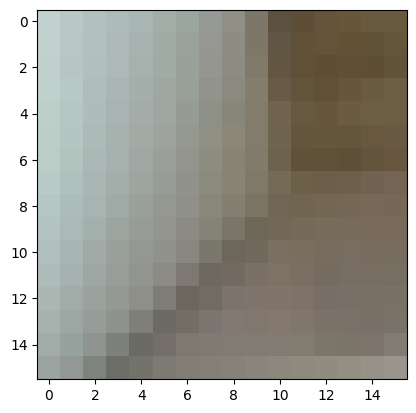

In [41]:
plt.imshow(tes[0])